In [5]:
from binance.client import Client
#print ("Input examples: pair= 'BTCUSDT' interval = Client.KLINE_INTERVAL_1MINUTE OR DAY OR HOUR start = '4 Aug, 2022' finish = '5 Aug, 2022'","get_hist_data(pair, interval,start,finish)")
def get_hist_data(pair,interval, start,finish):
  import pandas as pd
  client = Client(api_key,api_secret)
  klines = client.get_historical_klines(str(pair), interval, str(start), str(finish))
  df = pd.DataFrame(klines, columns =['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore'], dtype = float) 
  return df





In [6]:
import pandas as pd
def multivar_data(curr_list):
    pair= 'BTCUSDT' 
    interval = Client.KLINE_INTERVAL_1HOUR
    start = '1 Jan, 2020' 
    finish = '1 Mar, 2023'
    df_BTCUSDT=get_hist_data(pair, interval,start,finish)
    df_BTCUSDT['sec_0'] = pd.to_datetime((df_BTCUSDT['Close time']/1000).astype(int), unit='s')
    df_BTCUSDT['BTCUSDT'+'_Close'] = df_BTCUSDT['Close']
    df_merged= df_BTCUSDT[['BTCUSDT'+'_Close','sec_0']]
    for i in curr_list:
        pair= str(i) 
        interval = Client.KLINE_INTERVAL_1HOUR
        start = '1 Jan, 2020' 
        finish = '1 Mar, 2023'
        var_name = "df_" + str(i)
        var_name = get_hist_data(pair, interval,start,finish)
        var_name['sec_0'] = pd.to_datetime(((var_name)['Close time']/1000).astype(int), unit='s')
        var_name[str(i)+'_Close'] = var_name['Close']
        var_name= var_name[['sec_0',str(i)+'_Close']]
        df_merged = pd.merge(var_name, df_merged, how='inner', on=['sec_0'])
    return df_merged

In [7]:
curr_list = ['BUSDUSDT','ETHUSDT','BNBUSDT' ,'XRPUSDT' ,
             'ADAUSDT','DOGEUSDT','MATICUSDT' ,'SOLUSDT','DOTUSDT','LTCUSDT','AVAXUSDT']

In [8]:
merged = multivar_data(curr_list)

In [9]:
merged.head()

,sec_0,AVAXUSDT_Close,LTCUSDT_Close,DOTUSDT_Close,SOLUSDT_Close,MATICUSDT_Close,DOGEUSDT_Close,ADAUSDT_Close,XRPUSDT_Close,BNBUSDT_Close,ETHUSDT_Close,BUSDUSDT_Close,BTCUSDT_Close
0,2020-09-22 06:59:59,4.8811,43.35,3.9847,2.8000,0.01906,0.002598,0.08082,0.23230,23.3510,342.05,1.0001,10423.27
1,2020-09-22 07:59:59,4.9096,43.07,3.9164,2.6728,0.01863,0.002592,0.07962,0.22978,22.9993,336.12,1.0002,10372.90
2,2020-09-22 08:59:59,6.8219,43.58,4.0194,2.7602,0.01905,0.002616,0.08143,0.23129,23.4484,342.11,1.0003,10463.18
3,2020-09-22 09:59:59,6.2108,43.57,4.0207,2.7857,0.01923,0.002616,0.08153,0.23144,23.5538,340.09,1.0002,10452.03
4,2020-09-22 10:59:59,5.4901,43.75,4.0494,2.7847,0.01932,0.002634,0.08198,0.23197,23.8488,341.00,1.0002,10458.40


In [10]:
len(merged)

21332

In [3]:

# Set up the webdriver
import pandas as pd
from selenium.webdriver.common.by import By
from selenium import webdriver
driver = webdriver.Chrome()
driver.get('https://coinmarketcap.com')
page_height = driver.execute_script('return document.body.scrollHeight')
driver.execute_script('window.scrollBy(0, '+str(page_height)+')')
# sleep for 7 seconds for getting data
import time
time.sleep(7)

# Find the table and extract its content
table = driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[2]/div/div[1]/div[4]/table')
html = table.get_attribute('outerHTML')
df = pd.read_html(html)[0]
driver.quit()
import pandas as pd
import re

# Sample DataFrame with a "Name" column


# Define a function to extract the cryptocurrency symbol from a string
def get_symbol(s):
    symbol = re.search(r'([^\d]+)$', s).group(1)
    return symbol

# Apply the function to the "Name" column and store the result in a new "Symbol" column

df["Symbol"] = df["Name"].apply(get_symbol)

# Print the resulting DataFrame
df= df.drop(['Unnamed: 0','#','Name','Price','1h %', '24h %', '7d %', 'Market Cap',
       'Volume(24h)', 'Circulating Supply', 'Last 7 Days', 'Unnamed: 11'],axis=1)
# Returning first 100 highest market cap. Market Cap = Current Price x Circulating Supply.
# For more info check for following link: 
#https://support.coinmarketcap.com/hc/en-us/articles/360043836811-Market-Capitalization-Cryptoasset-Aggregate-
print(df.head())

  Symbol
0    BTC
1    ETH
2   USDT
3    BNB
4   USDC


In [15]:
df.head(20)

,Symbol
0,BTC
1,ETH
2,USDT
3,BNB
4,USDC
5,XRP
6,ADA
7,DOGE
8,MATIC
9,BUSD


In [11]:
merged.dtypes

sec_0              datetime64[ns]
AVAXUSDT_Close            float64
LTCUSDT_Close             float64
DOTUSDT_Close             float64
SOLUSDT_Close             float64
MATICUSDT_Close           float64
DOGEUSDT_Close            float64
ADAUSDT_Close             float64
XRPUSDT_Close             float64
BNBUSDT_Close             float64
ETHUSDT_Close             float64
BUSDUSDT_Close            float64
BTCUSDT_Close             float64
dtype: object

In [12]:
col_to_move = 'BTCUSDT_Close'

# remove the column and insert it at the first position
merged.insert(0, col_to_move, merged.pop(col_to_move))

print(merged.head())

   BTCUSDT_Close               sec_0  AVAXUSDT_Close  LTCUSDT_Close  \
0       10423.27 2020-09-22 06:59:59          4.8811          43.35   
1       10372.90 2020-09-22 07:59:59          4.9096          43.07   
2       10463.18 2020-09-22 08:59:59          6.8219          43.58   
3       10452.03 2020-09-22 09:59:59          6.2108          43.57   
4       10458.40 2020-09-22 10:59:59          5.4901          43.75   

   DOTUSDT_Close  SOLUSDT_Close  MATICUSDT_Close  DOGEUSDT_Close  \
0         3.9847         2.8000          0.01906        0.002598   
1         3.9164         2.6728          0.01863        0.002592   
2         4.0194         2.7602          0.01905        0.002616   
3         4.0207         2.7857          0.01923        0.002616   
4         4.0494         2.7847          0.01932        0.002634   

   ADAUSDT_Close  XRPUSDT_Close  BNBUSDT_Close  ETHUSDT_Close  BUSDUSDT_Close  
0        0.08082        0.23230        23.3510         342.05          1.0001  
1   

In [13]:
df_prep = merged.drop('sec_0', axis=1)

In [8]:
import pandas as pd
df_prep = pd.read_csv("multivar.csv").drop('Unnamed: 0',axis=1)

In [9]:
df_prep.head()

,BTCUSDT_Close,AVAXUSDT_Close,LTCUSDT_Close,DOTUSDT_Close,SOLUSDT_Close,MATICUSDT_Close,DOGEUSDT_Close,ADAUSDT_Close,XRPUSDT_Close,BNBUSDT_Close,ETHUSDT_Close,BUSDUSDT_Close
0,10423.27,4.8811,43.35,3.9847,2.8000,0.01906,0.002598,0.08082,0.23230,23.3510,342.05,1.0001
1,10372.90,4.9096,43.07,3.9164,2.6728,0.01863,0.002592,0.07962,0.22978,22.9993,336.12,1.0002
2,10463.18,6.8219,43.58,4.0194,2.7602,0.01905,0.002616,0.08143,0.23129,23.4484,342.11,1.0003
3,10452.03,6.2108,43.57,4.0207,2.7857,0.01923,0.002616,0.08153,0.23144,23.5538,340.09,1.0002
4,10458.40,5.4901,43.75,4.0494,2.7847,0.01932,0.002634,0.08198,0.23197,23.8488,341.00,1.0002


In [10]:
import numpy as np
def split_data(series, train_fraq, test_len=120):
    """Splits input series into train, val and test.
    
        Default to 1 year of test data.
    """
    #slice the last year of data for testing 1 year has 8760 hours
    test_slice = len(series)-test_len

    test_data = series[test_slice:]
    train_val_data = series[:test_slice]

    #make train and validation from the remaining
    train_size = int(len(train_val_data) * train_fraq)
    
    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]
    
    return train_data, val_data, test_data




#add hour and month features

train_multi, val_multi, test_multi = split_data(df_prep, train_fraq=0.65, test_len=15)
print("Multivarate Datasets")
print(f"Train Data Shape: {train_multi.shape}")
print(f"Val Data Shape: {val_multi.shape}")
print(f"Test Data Shape: {test_multi.shape}")
print(f"Nulls In Train {np.any(np.isnan(train_multi))}")
print(f"Nulls In Validation {np.any(np.isnan(val_multi))}")
print(f"Nulls In Test {np.any(np.isnan(test_multi))}")

Multivarate Datasets
Train Data Shape: (13856, 12)
Val Data Shape: (7461, 12)
Test Data Shape: (15, 12)
Nulls In Train False
Nulls In Validation False
Nulls In Test False


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    """ Create a windowed tensorflow dataset
    
    """

    #create a window with n steps back plus the size of the prediction length
    window = n_steps + n_horizon
    
    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)
    
    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)
    
    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)    
    
    #create the supervised learning problem x and y and batch
    if multi_var:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, :1]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))
    
    ds = ds.batch(batch_size).prefetch(1)
    
    return ds

tf.random.set_seed(42)

n_steps = 115
n_horizon = 1
batch_size =128
shuffle_buffer = 100


ds = window_dataset(train_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)

print('Example sample shapes')
for idx,(x,y) in enumerate(ds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

Example sample shapes
x =  (128, 115, 12)
y =  (128, 1, 1)


In [12]:
def build_dataset(train_fraq=0.65, 
                  n_steps=115, 
                  n_horizon=1, 
                  batch_size=128, 
                  shuffle_buffer=100, 
                  expand_dims=False, 
                  multi_var=False):
    """If multi variate then first column is always the column from which the target is contstructed.
    """
    
    tf.random.set_seed(23)
    data = df_prep
    mm = MinMaxScaler()
    data = mm.fit_transform(data)

    
    train_data, val_data, test_data = split_data(data, train_fraq=train_fraq, test_len=125)
    
    train_ds = window_dataset(train_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    val_ds = window_dataset(val_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    test_ds = window_dataset(test_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    
    
    print(f"Prediction lookback (n_steps): {n_steps}")
    print(f"Prediction horizon (n_horizon): {n_horizon}")
    print(f"Batch Size: {batch_size}")
    print("Datasets:")
    print(train_ds.element_spec)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = build_dataset(multi_var=True)

Prediction lookback (n_steps): 115
Prediction horizon (n_horizon): 1
Batch Size: 128
Datasets:
(TensorSpec(shape=(None, None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


In [13]:
def get_params(multivar=True):
    lr = 0.00001
    n_steps=115
    n_horizon=1
    if multivar:
        n_features=12
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


from tensorflow.keras.callbacks import EarlyStopping
def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, restore_best_weights=True)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[early_stopping])

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [14]:
def dnn_model(n_steps, n_horizon, n_features, lr):
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(512, activation='tanh'),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(512, activation='tanh'),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(n_horizon)
    ], name='dnn')
    
    loss=tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mse'])
    
    return model


dnn = dnn_model(*get_params(multivar=True))
dnn.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1380)              0         
                                                                 
 dense (Dense)               (None, 512)               707072    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 970,241
Trainable params: 970,241
Non-trainable p

In [32]:
def lstm_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, activation='tanh', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True)),
        tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(128, activation='tanh', return_sequences=False),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dropout(0.05),
       
        tf.keras.layers.Dense(128, activation='tanh'),
        #tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mse'])
    
    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 115, 128)          72192     
                                                                 
 bidirectional (Bidirectiona  (None, 115, 256)         263168    
 l)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 115, 128)          197120    
                                                                 
 lstm_3 (LSTM)               (None, 115, 128)          131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                              

In [24]:
def gru_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(128, activation='tanh', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.GRU(128, activation='tanh', return_sequences=True),
        tf.keras.layers.GRU(128, activation='tanh', return_sequences=True),
        tf.keras.layers.GRU(128, activation='tanh', return_sequences=False),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Dense(128, activation='tanh'),
        #tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mse'])
    
    return model

gru = gru_model(*get_params(multivar=True))
gru.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 115, 128)          54528     
                                                                 
 gru_1 (GRU)                 (None, 115, 128)          99072     
                                                                 
 gru_2 (GRU)                 (None, 115, 128)          99072     
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129    

In [25]:
model_configs=dict()
#run_model("dnn", dnn_model, model_configs, epochs=50)
run_model("lstm", lstm_model, model_configs, epochs=200)
run_model("gru", gru_model, model_configs, epochs=200)

Prediction lookback (n_steps): 115
Prediction horizon (n_horizon): 1
Batch Size: 128
Datasets:
(TensorSpec(shape=(None, None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/200
107/107 [==============================] - 11s 61ms/step - loss: 0.0024 - mse: 0.0049 - val_loss: 0.0358 - val_mse: 0.0716
Epoch 2/200
107/107 [==============================] - 6s 51ms/step - loss: 0.0089 - mse: 0.0179 - val_loss: 0.0548 - val_mse: 0.1095
Epoch 3/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0109 - mse: 0.0218 - val_loss: 0.0556 - val_mse: 0.1113
Epoch 4/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0101 - mse: 0.0202 - val_loss: 0.0444 - val_mse: 0.0889
Epoch 5/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0095 - mse: 0.0191 - val_loss: 0.0387 - val_mse: 0.0774
Epoch 6/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0091 - mse: 0.0181 - val_l

Epoch 59/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0015 - mse: 0.0029 - val_loss: 9.1654e-04 - val_mse: 0.0018
Epoch 60/200
107/107 [==============================] - 5s 51ms/step - loss: 0.0019 - mse: 0.0037 - val_loss: 2.3309e-04 - val_mse: 4.6619e-04
Epoch 61/200
107/107 [==============================] - 5s 51ms/step - loss: 0.0017 - mse: 0.0033 - val_loss: 4.6411e-04 - val_mse: 9.2823e-04
Epoch 62/200
107/107 [==============================] - 5s 50ms/step - loss: 0.0017 - mse: 0.0034 - val_loss: 6.4643e-04 - val_mse: 0.0013
Epoch 63/200
107/107 [==============================] - 5s 51ms/step - loss: 0.0020 - mse: 0.0040 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 64/200
107/107 [==============================] - 6s 53ms/step - loss: 0.0021 - mse: 0.0042 - val_loss: 5.3787e-04 - val_mse: 0.0011
Epoch 65/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0017 - mse: 0.0035 - val_loss: 0.0017 - val_mse: 0.0033
Epoch 66/200
107/107 [=====

107/107 [==============================] - 5s 51ms/step - loss: 0.0025 - mse: 0.0050 - val_loss: 0.0024 - val_mse: 0.0047
Epoch 19/200
107/107 [==============================] - 5s 49ms/step - loss: 0.0026 - mse: 0.0051 - val_loss: 0.0030 - val_mse: 0.0061
Epoch 20/200
107/107 [==============================] - 5s 50ms/step - loss: 0.0022 - mse: 0.0044 - val_loss: 0.0113 - val_mse: 0.0227
Epoch 21/200
107/107 [==============================] - 5s 50ms/step - loss: 0.0030 - mse: 0.0060 - val_loss: 0.0014 - val_mse: 0.0029
Epoch 22/200
107/107 [==============================] - 6s 52ms/step - loss: 0.0029 - mse: 0.0059 - val_loss: 0.0142 - val_mse: 0.0284
Epoch 23/200
107/107 [==============================] - 5s 51ms/step - loss: 0.0036 - mse: 0.0072 - val_loss: 0.0036 - val_mse: 0.0073
Epoch 24/200
107/107 [==============================] - 5s 50ms/step - loss: 0.0020 - mse: 0.0039 - val_loss: 0.0016 - val_mse: 0.0032
Epoch 25/200
107/107 [==============================] - 5s 50ms/step

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

Loss Curves


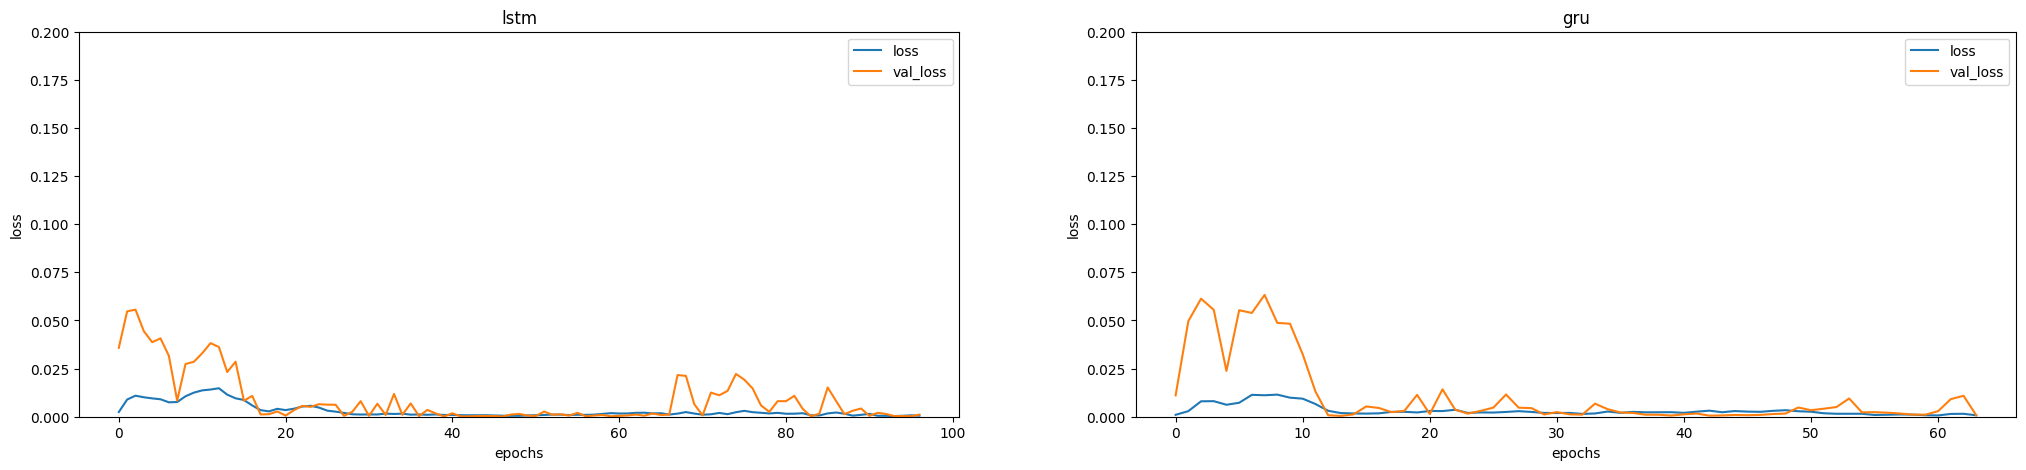

In [26]:
legend = list()

fig, axs = plt.subplots(1, 2, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 0.2)
print("Loss Curves")

Loss Curves


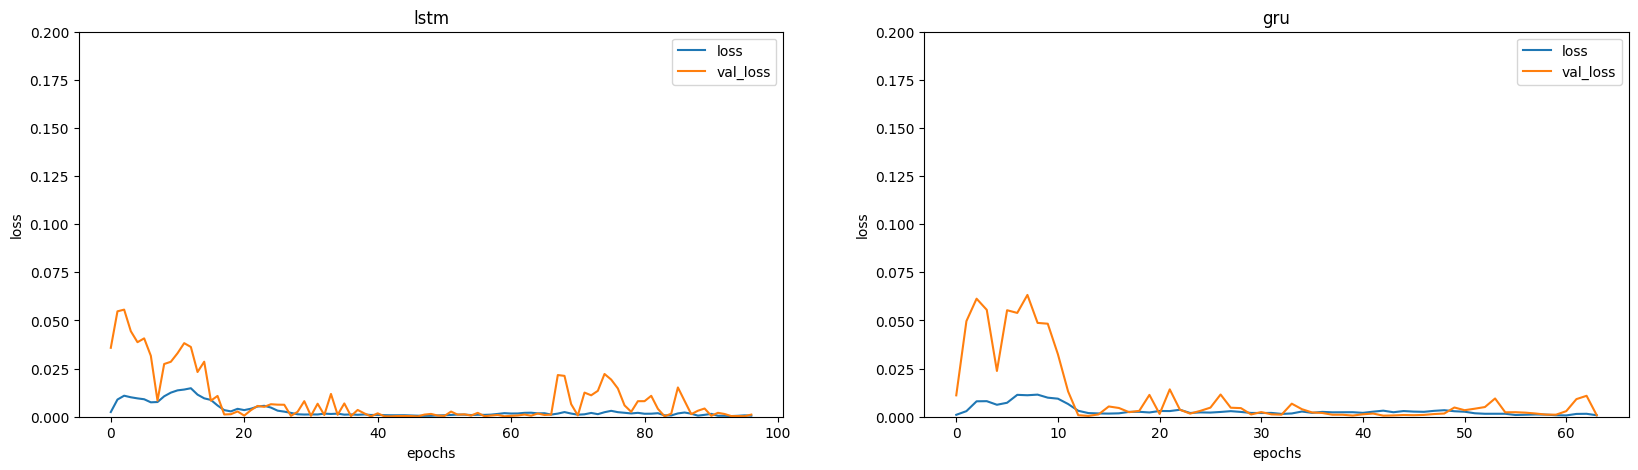

In [27]:
legend = list()

fig, axs = plt.subplots(1, 2, figsize=(20,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 0.2)
print("Loss Curves")

MAE Curves


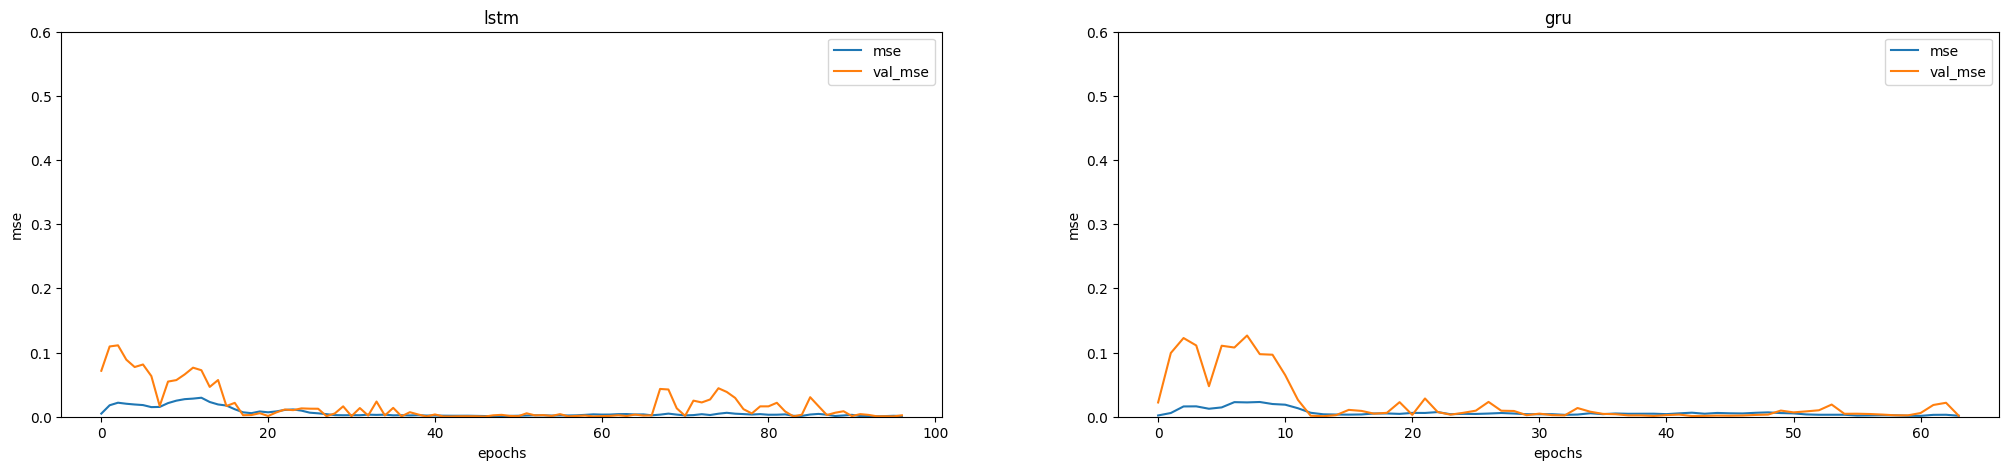

In [28]:
print("MAE Curves")
fig, axs = plt.subplots(1, 2, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mse', val, ax, 0.6)

In [29]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df['error_mw'] = performance_df['mae'] * df_prep['BTCUSDT_Close'].mean()
print(performance_df)

1/1 [==============================] - 0s 75ms/step - loss: 0.0015 - mse: 0.0030
           mae    error_mw
lstm  0.000008    0.262968
gru   0.003018  103.418190


1/1 [==============================] - 1s 853ms/step
First Two Weeks of Predictions


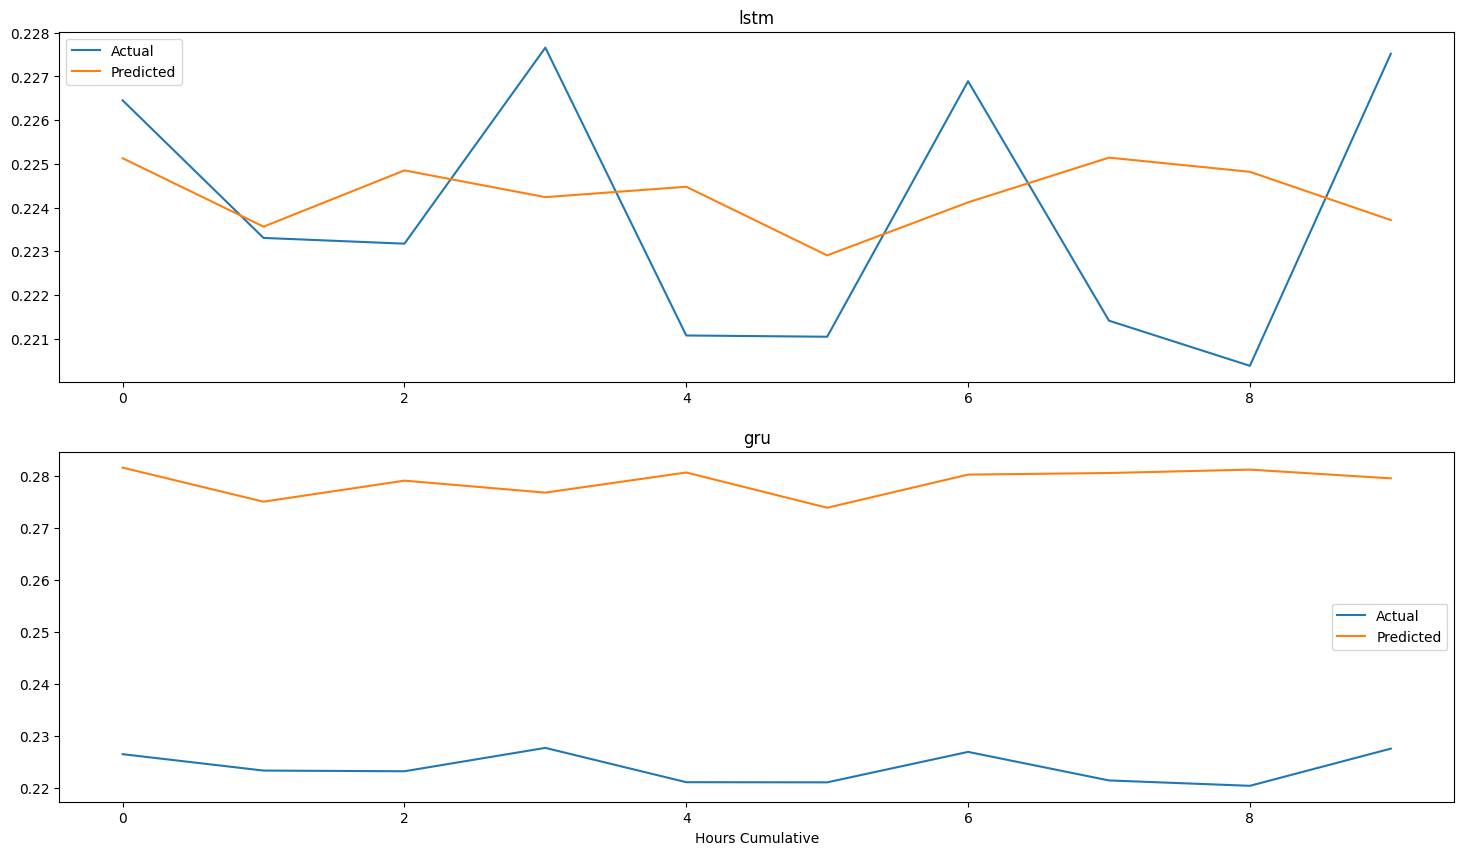

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(18, 10))
days = 120

vline = np.linspace(0, 23, 24)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy().reshape(-1))
    ax.plot(preds.reshape(-1))
    ax.set_title(key)
    #ax.vlines(vline, ymin=., ymax=.30, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual", "Predicted"])

plt.xlabel("Hours Cumulative")
print('First Two Weeks of Predictions')

In [ ]:
df_prep.head()

In [90]:
df_prep.to_csv('multivar.csv')

In [33]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2
